# Function Approximation Using Particle-in-a-Box Basis  

## Introduction  
This notebook demonstrates how to approximate arbitrary functions using a **linear combination of eigenfunctions** from the **particle-in-a-box quantum system**. The eigenfunctions serve as a **basis set**, similar to a Fourier series, and are used to reconstruct various target functions.  

## What You'll Find in This Notebook  
- **Particle-in-a-Box Eigenfunctions**  
  - The eigenfunctions $\psi_n(x) = \sqrt{2} \sin(n \pi x)$ form an **orthonormal basis** on $ [0,1] $.  

- **Interactive Function Approximation**  
  - Select a function and choose the number of basis functions $N$  to see how well the approximation performs.  

- **Challenging Target Functions**  
  - Step function, sawtooth wave, Gaussian peak, absolute value function, oscillatory sine, and double-step functions.  

## How to Use This Notebook  
- **Run all cells** to initialize the environment.  
- **Use the interactive controls** to select a function and adjust the number of basis functions $N$.  
- **Observe how the approximation improves** as more basis functions are included.  

Can the particle-in-a-box basis approximate all functions well? Run the notebook and find out!


In [40]:
# Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Ensure interactive plots
%matplotlib widget

In [41]:
#  Define the Basis Functions
def psi(n, x):
    """Particle in a Box Eigenfunction."""
    return np.sqrt(2) * np.sin(n * np.pi * x)

# Compute Expansion Coefficients
def compute_coefficients(func, N):
    """Compute the expansion coefficients for a given function."""
    coefficients = []
    x_vals = np.linspace(0, 1, 1000)
    for n in range(1, N+1):
        integral = np.trapezoid(func(x_vals) * psi(n, x_vals), x_vals)  # Numerical integration
        coefficients.append(integral)
    return np.array(coefficients)

# Function Reconstruction
def reconstruct_function(coeffs, N, x):
    """Reconstruct the function using basis functions and coefficients."""
    approximation = sum(coeffs[n-1] * psi(n, x) for n in range(1, N+1))
    return approximation

interactive(children=(IntSlider(value=5, description='Number of basis functions', min=1), Dropdown(description…

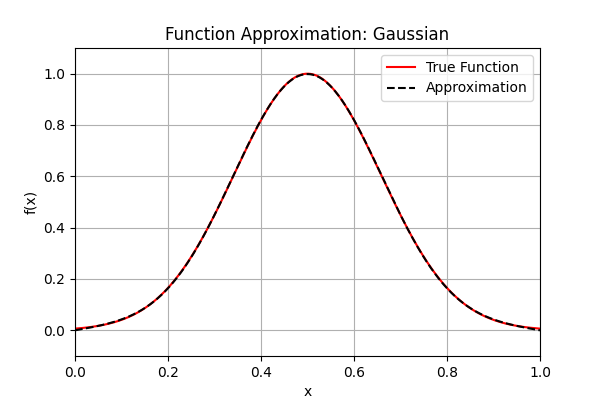

In [45]:
from IPython.display import HTML

def gaussian_function(x):
    """Gaussian function"""
    return np.exp(-20 * (x - 0.5) ** 2)

def step_function(x):
    """Step function (Heaviside-like)."""
    return np.where(x < 0.5, 0, 1)

def sawtooth_function(x):
    """Sawtooth wave (linear increase from 0 to 1)."""
    return x - np.floor(x)

def absolute_function(x):
    """Absolute value function: |x - 0.5|."""
    return np.abs(x - 0.5)

def double_step_function(x):
    """Double-step function: 1 at x < 0.3 or x > 0.7, 0 elsewhere."""
    return np.where((x < 0.3) | (x > 0.7), 1, 0)

# Updated function dictionary with more challenging functions
function_dict = {
    'Gaussian': gaussian_function,
    'Step Function': step_function,
    'Sawtooth Function': sawtooth_function,
    'Absolute Value: |x - 0.5|': absolute_function,
    'Double Step Function': double_step_function
}

# Interactive Widgets
N_slider = widgets.IntSlider(min=1, max=20, step=1, value=5, description='N (Basis)')
function_selector = widgets.Dropdown(
    options=function_dict.keys(),
    value='Gaussian',
    description='Function:'
)

# Create a persistent figure and axis
fig, ax = plt.subplots(figsize=(6, 4))
x_vals = np.linspace(0, 1, 1000)

# Initial placeholder lines (to be updated)
true_func_line, = ax.plot(x_vals, np.zeros_like(x_vals), 'r-', label="True Function")
approx_func_line, = ax.plot(x_vals, np.zeros_like(x_vals), 'k--', label="Approximation")

# Formatting
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
ax.set_xlim(0,1)
ax.set_ylim(-0.1,1.1)
ax.set_title("Function Approximation with Particle-in-a-Box Basis")
ax.legend()
ax.grid(True)

def update_plot(N, function_key):
    """Update the existing plot without flickering."""
    func = function_dict[function_key]

    # Compute coefficients & reconstruct function
    coeffs = compute_coefficients(func, N)
    approx_vals = reconstruct_function(coeffs, N, x_vals)

    # Update y-data instead of clearing and re-plotting
    true_func_line.set_ydata(func(x_vals))
    approx_func_line.set_ydata(approx_vals)

    ax.set_title("Function Approximation: %s" % function_key)

    # Redraw the figure without flickering
    fig.canvas.draw_idle()

# Disable toolbar (prevents zoom-based scrollbars)
fig.canvas.toolbar_visible = False  
fig.canvas.header_visible = False  
fig.canvas.footer_visible = False  

# Interactive widgets
N_slider = widgets.IntSlider(min=1, max=100, step=1, value=5, description="Number of basis functions")
function_selector = widgets.Dropdown(
    options=function_dict.keys(),
    value="Gaussian",
    description="Function:"
)

# Display widgets and connect to function
widgets.interactive(update_plot, N=N_slider, function_key=function_selector)